MAE: 14.90076846868144
RMSE: 18.977577413682152
MAPE: 12.704383679840653


C:\Users\MANOJ KUMAR T\AppData\Local\Temp\ipykernel_14104\1073797220.py:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


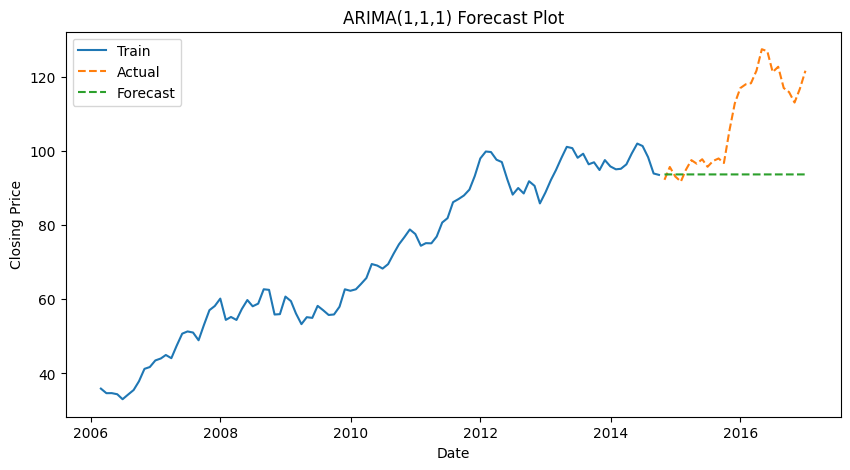

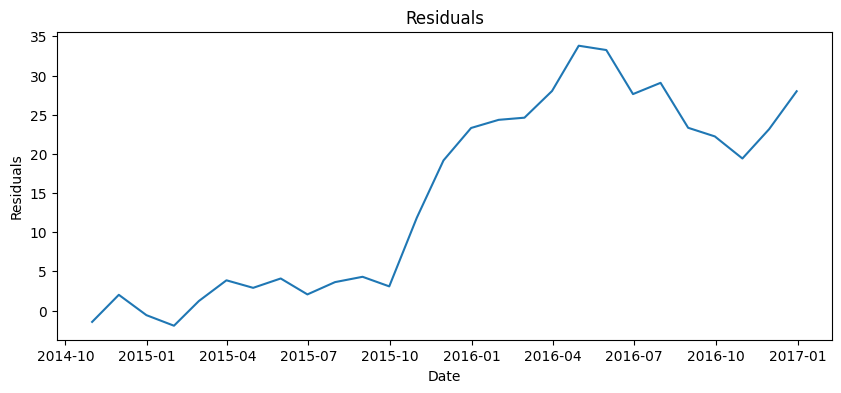

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("ML471_S3_Datafile_Practice.csv")

# Date preprocessing
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Drop unnecessary features
df.drop(columns=["SMA_10", "SMA_30", "SES"], errors="ignore", inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Target variable
y = df["Close"]

# Train-test split (80-20)
split = int(len(y) * 0.8)
train, test = y[:split], y[split:]

# Fit ARIMA(1,1,1)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Error metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

# Forecast plot
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual", linestyle="--")
plt.plot(test.index, forecast, label="Forecast", linestyle="--")
plt.title("ARIMA(1,1,1) Forecast Plot")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Residuals
residuals = test - forecast

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()
